You can also try this: Go to the path where Python is installed in your system. For me it was something like C:\Users\\Local Settings\Application Data\Programs\Python\Python37 In this folder, you'll find a python executable. Just create a duplicate and rename it to python3. Works every time.

In [197]:
import sys
print(sys.path)

['c:\\Users\\ailaty\\Downloads\\CS 631 Introduction to Big Data\\Final Project', 'c:\\Users\\ailaty\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\ailaty\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\ailaty\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\ailaty\\AppData\\Local\\Programs\\Python\\Python310', '', 'C:\\Users\\ailaty\\AppData\\Roaming\\Python\\Python310\\site-packages', 'C:\\Users\\ailaty\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32', 'C:\\Users\\ailaty\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32\\lib', 'C:\\Users\\ailaty\\AppData\\Roaming\\Python\\Python310\\site-packages\\Pythonwin', 'c:\\Users\\ailaty\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages']


Tensorflow installation: https://www.tensorflow.org/install/pip

If you get the error on path(dictionary): https://stackoverflow.com/questions/37400974/error-unicode-error-unicodeescape-codec-cant-decode-bytes-in-position-2-3

In [198]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
# for Box-Cox Transformation
from scipy import stats
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
# helpful character encoding module
import chardet
# incosistant data entry
import fuzzywuzzy
from fuzzywuzzy import process

In [199]:
# from google.colab import drive
# drive.mount('/content/drive')

In [200]:
# # specify the directory containing the csv files
# directory = '/content/drive/My Drive/data/your_file.csv'

# # list all csv files in the directory
# csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# # combine all csv files into one dataframe
# df = pd.concat([pd.read_csv(os.path.join(directory, csv_file)) for csv_file in csv_files])

# # write the combined dataframe to a new csv file
# df.to_csv("combined_csv.csv", index=False)


In [201]:
# data = pd.read_csv("/content/drive/My Drive/CS 631 Introduction to Big Data/New folder/combined_csv.csv")

In [202]:
data = pd.read_csv("combined_csv.csv")
np.random.seed(0) 

np.random.seed(0) is used to set the random seed of NumPy, which is a library in Python for the manipulation of arrays. By setting the seed, we can ensure that the results of the random number generator are reproducible, i.e., they will always be the same each time the program is run with the same seed. In this line of code, the seed value 0 is being used, which means that every time the program is run with this seed, the same set of random numbers will be generated. This is useful for debugging or for testing purposes, as it allows us to isolate the impact of other parts of the program from the random number generator.

In [203]:
data.shape

(59120, 21)

In [204]:
data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2021-01-02 05:30:44,32.3182,-86.9023,365747,4872,202137.0,158738.0,1.0,...,NaN,NaN,1.332068,84000001.0,USA,NaN,NaN,2021-01-01,NaN,NaN
1,Alaska,US,2021-01-02 05:30:44,61.3707,-152.4044,47019,206,7165.0,39648.0,2.0,...,1275750.0,NaN,0.438121,84000002.0,USA,174391.185778,NaN,2021-01-01,NaN,NaN
2,American Samoa,US,2021-01-02 05:30:44,-14.2710,-170.1320,0,0,NaN,NaN,60.0,...,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN,2021-01-01,NaN,NaN
3,Arizona,US,2021-01-02 05:30:44,33.7298,-111.4312,530267,9015,76934.0,444318.0,4.0,...,5155330.0,NaN,1.700087,84000004.0,USA,39551.860582,NaN,2021-01-01,NaN,NaN
4,Arkansas,US,2021-01-02 05:30:44,34.9697,-92.3731,229442,3711,199247.0,26484.0,5.0,...,2051488.0,NaN,1.617402,84000005.0,USA,67979.497674,NaN,2021-01-01,NaN,NaN


In [205]:
data.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
59115,Virginia,US,2023-01-01 04:31:23,37.7693,-78.1700,2199302,22670,NaN,NaN,51.0,...,NaN,NaN,1.030782,84000051.0,USA,NaN,NaN,NaN,NaN,NaN
59116,Washington,US,2023-01-01 04:31:23,47.4009,-121.4905,1883676,15038,NaN,NaN,53.0,...,NaN,NaN,0.798333,84000053.0,USA,NaN,NaN,NaN,NaN,NaN
59117,West Virginia,US,2023-01-01 04:31:23,38.4912,-80.9545,624721,7672,NaN,NaN,54.0,...,NaN,NaN,1.228068,84000054.0,USA,NaN,NaN,NaN,NaN,NaN
59118,Wisconsin,US,2023-01-01 04:31:23,44.2685,-89.6165,1960878,15802,NaN,NaN,55.0,...,NaN,NaN,0.805863,84000055.0,USA,NaN,NaN,NaN,NaN,NaN
59119,Wyoming,US,2023-01-01 04:31:23,42.7560,-107.3025,182847,1958,NaN,NaN,56.0,...,NaN,NaN,1.070841,84000056.0,USA,NaN,NaN,NaN,NaN,NaN


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59120 entries, 0 to 59119
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        59120 non-null  object 
 1   Country_Region        59120 non-null  object 
 2   Last_Update           59101 non-null  object 
 3   Lat                   57064 non-null  float64
 4   Long_                 57064 non-null  float64
 5   Confirmed             59120 non-null  int64  
 6   Deaths                59120 non-null  int64  
 7   Recovered             15122 non-null  float64
 8   Active                15122 non-null  float64
 9   FIPS                  59101 non-null  float64
 10  Incident_Rate         57064 non-null  float64
 11  Total_Test_Results    36637 non-null  float64
 12  People_Hospitalized   5129 non-null   float64
 13  Case_Fatality_Ratio   46533 non-null  float64
 14  UID                   59120 non-null  float64
 15  ISO3               

In [207]:
data.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
Total_Test_Results      float64
People_Hospitalized     float64
Case_Fatality_Ratio     float64
UID                     float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
Date                     object
People_Tested           float64
Mortality_Rate          float64
dtype: object

In [208]:
data.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
count,57064.000000,57064.000000,5.912000e+04,59120.000000,1.512200e+04,1.512200e+04,59101.000000,57064.000000,3.663700e+04,5129.000000,46533.000000,5.912000e+04,4.592100e+04,5129.000000,1.181600e+04,12027.000000
mean,36.840089,-85.206614,8.353134e+05,11257.083187,8.578908e+04,5.936916e+04,3284.976447,14243.265003,1.144235e+07,6151.226555,1.346480,7.676417e+07,1.161119e+05,12.143891,1.111017e+06,3.322792
std,10.789486,49.308644,1.403547e+06,16793.134320,1.933303e+05,1.190129e+05,17249.739134,11016.750051,2.018320e+07,13791.089316,0.599868,2.357406e+07,1.307875e+05,5.245396,2.059628e+06,2.487746
min,-14.271000,-170.132200,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.768000e+03,2.000000,0.000000,1.600000e+01,5.973514e-08,1.418440,3.000000e+00,0.000000
25%,34.594600,-101.165775,6.065075e+04,1040.000000,3.872000e+03,3.166000e+03,18.000000,3705.303547,1.771434e+06,558.000000,1.027350,8.400001e+07,7.422100e+03,8.359942,1.132178e+05,1.667964
50%,39.061850,-87.944200,3.230550e+05,4714.000000,1.754850e+04,1.475250e+04,32.000000,11624.900228,4.784927e+06,2014.000000,1.306293,8.400003e+07,7.692253e+04,11.282093,4.153255e+05,2.850501
75%,42.361650,-76.970625,9.811215e+05,14320.000000,8.425575e+04,6.111500e+04,48.000000,24626.484923,1.296786e+07,6001.000000,1.613501,8.400004e+07,1.787269e+05,15.268243,1.152972e+06,4.473480
max,61.370700,145.673900,1.197312e+07,99817.000000,2.470308e+06,1.408516e+06,99999.000000,58927.992268,1.844461e+08,89995.000000,8.803612,8.410000e+07,7.901759e+05,38.501190,1.956515e+07,70.370370


In [209]:
data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'Total_Test_Results', 'People_Hospitalized', 'Case_Fatality_Ratio',
       'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate', 'Date',
       'People_Tested', 'Mortality_Rate'],
      dtype='object')

In [210]:
# Check for missing values
missing_values_count = data.isnull().sum()
missing_values_count

Province_State              0
Country_Region              0
Last_Update                19
Lat                      2056
Long_                    2056
Confirmed                   0
Deaths                      0
Recovered               43998
Active                  43998
FIPS                       19
Incident_Rate            2056
Total_Test_Results      22483
People_Hospitalized     53991
Case_Fatality_Ratio     12587
UID                         0
ISO3                        0
Testing_Rate            13199
Hospitalization_Rate    53991
Date                     7366
People_Tested           47304
Mortality_Rate          47093
dtype: int64

In [211]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

28.36974031831948


Wow, more than a quarter of the cells in this dataset are empty!

Use this code if you want to remove all the rows that contain a missing value
data.dropna()
But it is not logical in our dataset, because every row in our dataset had at least one missing value. We might have better luck removing all the columns that have at least one missing value instead.
Use this code if you want to remove all columns with at least one missing value
columns_with_na_dropped = data.dropna(axis=1)
Again, it is not logical

In [212]:
# Check for duplicate rows
print("Duplicated rows:", data.duplicated().sum())

Duplicated rows: 0


If you want to replace all NA's with 0, use this code:
data.fillna(0)

In [213]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
data.fillna(method='bfill', axis=0).fillna(0)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2021-01-02 05:30:44,32.3182,-86.9023,365747,4872,202137.0,158738.0,1.0,...,1275750.0,437.0,1.332068,84000001.0,USA,174391.185778,12.264945,2021-01-01,62029.0,2.536133
1,Alaska,US,2021-01-02 05:30:44,61.3707,-152.4044,47019,206,7165.0,39648.0,2.0,...,1275750.0,437.0,0.438121,84000002.0,USA,174391.185778,12.264945,2021-01-01,62029.0,2.536133
2,American Samoa,US,2021-01-02 05:30:44,-14.2710,-170.1320,0,0,76934.0,444318.0,60.0,...,2140.0,437.0,1.700087,16.0,ASM,3846.084722,12.264945,2021-01-01,62029.0,2.536133
3,Arizona,US,2021-01-02 05:30:44,33.7298,-111.4312,530267,9015,76934.0,444318.0,4.0,...,5155330.0,437.0,1.700087,84000004.0,USA,39551.860582,12.264945,2021-01-01,62029.0,2.536133
4,Arkansas,US,2021-01-02 05:30:44,34.9697,-92.3731,229442,3711,199247.0,26484.0,5.0,...,2051488.0,437.0,1.617402,84000005.0,USA,67979.497674,12.264945,2021-01-01,62029.0,2.536133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59115,Virginia,US,2023-01-01 04:31:23,37.7693,-78.1700,2199302,22670,0.0,0.0,51.0,...,0.0,0.0,1.030782,84000051.0,USA,0.000000,0.000000,0,0.0,0.000000
59116,Washington,US,2023-01-01 04:31:23,47.4009,-121.4905,1883676,15038,0.0,0.0,53.0,...,0.0,0.0,0.798333,84000053.0,USA,0.000000,0.000000,0,0.0,0.000000
59117,West Virginia,US,2023-01-01 04:31:23,38.4912,-80.9545,624721,7672,0.0,0.0,54.0,...,0.0,0.0,1.228068,84000054.0,USA,0.000000,0.000000,0,0.0,0.000000
59118,Wisconsin,US,2023-01-01 04:31:23,44.2685,-89.6165,1960878,15802,0.0,0.0,55.0,...,0.0,0.0,0.805863,84000055.0,USA,0.000000,0.000000,0,0.0,0.000000


Scaling vs. Normalization: What's the difference?
One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

in scaling, you're changing the range of your data, while
in normalization, you're changing the shape of the distribution of your data.

Scaling
This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

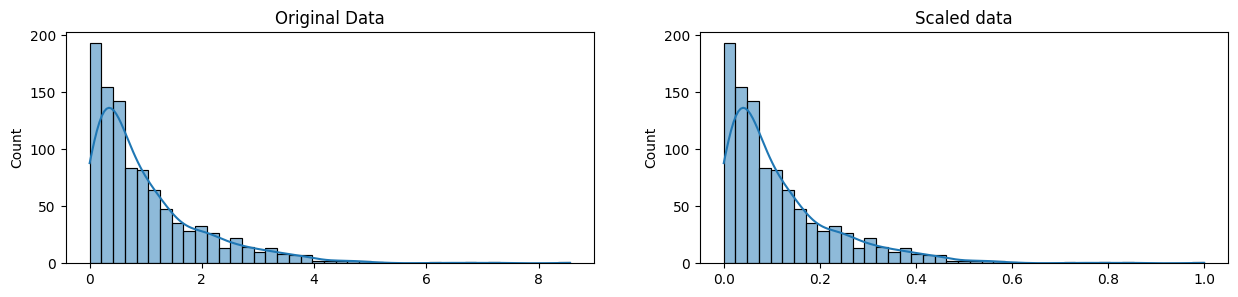

In [214]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

Normalization
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

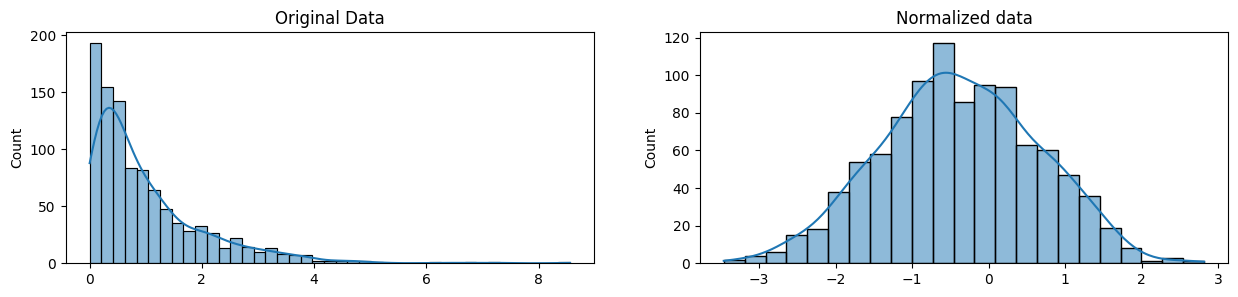

In [215]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").

Convert our date columns to datetime
Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

In [216]:
data['Date'].dtype

dtype('O')

The letter code to the dtype of the object. "O" is the code for "object"

In [217]:
data['date_parsed'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")
data['date_parsed'].head()

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: date_parsed, dtype: datetime64[ns]

In [218]:
data['date_parsed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59120 entries, 0 to 59119
Series name: date_parsed
Non-Null Count  Dtype         
--------------  -----         
51754 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 462.0 KB


In [219]:
unique_dates_count = data['date_parsed'].nunique()
print(unique_dates_count)

892


In [220]:
unique_dates = data['date_parsed'].unique()
print(unique_dates)

['2021-01-01T00:00:00.000000000' '2022-01-01T00:00:00.000000000'
                           'NaT' '2021-01-02T00:00:00.000000000'
 '2022-01-02T00:00:00.000000000' '2021-01-03T00:00:00.000000000'
 '2022-01-03T00:00:00.000000000' '2021-01-04T00:00:00.000000000'
 '2022-01-04T00:00:00.000000000' '2021-01-05T00:00:00.000000000'
 '2022-01-05T00:00:00.000000000' '2021-01-06T00:00:00.000000000'
 '2022-01-06T00:00:00.000000000' '2021-01-07T00:00:00.000000000'
 '2022-01-07T00:00:00.000000000' '2021-01-08T00:00:00.000000000'
 '2022-01-08T00:00:00.000000000' '2021-01-09T00:00:00.000000000'
 '2022-01-09T00:00:00.000000000' '2021-01-10T00:00:00.000000000'
 '2022-01-10T00:00:00.000000000' '2021-01-11T00:00:00.000000000'
 '2022-01-11T00:00:00.000000000' '2021-01-12T00:00:00.000000000'
 '2022-01-12T00:00:00.000000000' '2021-01-13T00:00:00.000000000'
 '2022-01-13T00:00:00.000000000' '2021-01-14T00:00:00.000000000'
 '2022-01-14T00:00:00.000000000' '2021-01-15T00:00:00.000000000'
 '2022-01-15T00:00:00.000

What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you can have pandas try to infer what the right date format should be. You can do that like so:
landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

In [221]:
# get the day of the month from the date_parsed column
day_of_month = data['date_parsed'].dt.day
day_of_month.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: date_parsed, dtype: float64

In [222]:
month = data['date_parsed'].dt.month
month.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: date_parsed, dtype: float64

C:\Users\ailaty\AppData\Local\Temp\ipykernel_30936\1692280773.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month, kde=False, bins=31)


<AxesSubplot:xlabel='date_parsed'>

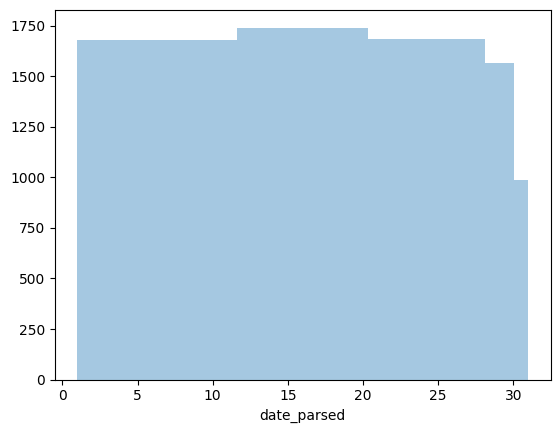

In [223]:
# remove na's
day_of_month = day_of_month.dropna()

# month = month.dropna()

# plot the day of the month
sns.distplot(day_of_month, kde=False, bins=31)
# sns.distplot(month, kde=False, bins=12)

In [224]:
states = data['Province_State'].unique()

# sort them alphabetically and then take a closer look
states.sort()
states

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Recovered',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [225]:
data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'Total_Test_Results', 'People_Hospitalized', 'Case_Fatality_Ratio',
       'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate', 'Date',
       'People_Tested', 'Mortality_Rate', 'date_parsed'],
      dtype='object')

In [239]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select the columns to use as predictors
# data = pd.read_csv("combined_csv.csv")
# data = pd.get_dummies(data, columns=['Date'])

# data = data.reset_index(drop=True)

X = data.copy()
X.dropna(inplace=True)
# Select the target column
Y = X.pop('Deaths')
# Apply Univariate Feature Selection
selector = SelectKBest(score_func=chi2, k=10)
fit = selector.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

KeyError: 'Deaths'

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = data.copy()
y = X.pop("Deaths")

# Train and score baseline model
baseline = RandomForestRegressor(criterion="mae", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

KeyError: 'Deaths'

C:\Users\ailaty\AppData\Local\Temp\ipykernel_30936\3657035259.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


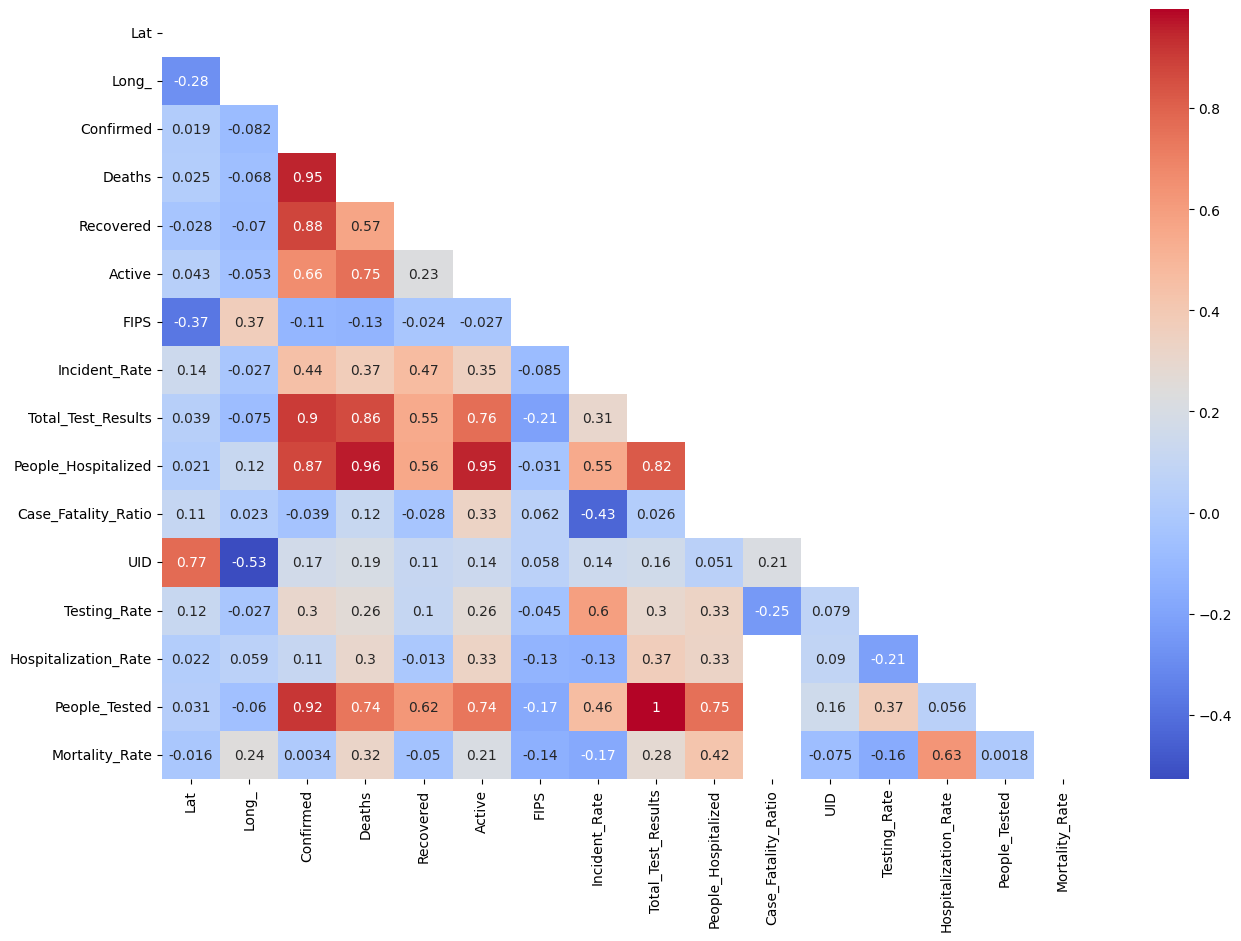

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# create a larger figure
fig = plt.subplots(figsize=(15,10))
# Plot the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True)

plt.show()

In [ ]:
data.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'Total_Test_Results',
       'People_Hospitalized', 'Case_Fatality_Ratio', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate', 'Date', 'People_Tested',
       'Mortality_Rate', 'Province_State_Alabama', 'Province_State_Alaska',
       'Province_State_American Samoa', 'Province_State_Arizona',
       'Province_State_Arkansas', 'Province_State_California',
       'Province_State_Colorado', 'Province_State_Connecticut',
       'Province_State_Delaware', 'Province_State_Diamond Princess',
       'Province_State_District of Columbia', 'Province_State_Florida',
       'Province_State_Georgia', 'Province_State_Grand Princess',
       'Province_State_Guam', 'Province_State_Hawaii', 'Province_State_Idaho',
       'Province_State_Illinois', 'Province_State_Indiana',
       'Province_State_Iowa', 'Province_State_Kansas',
       'Province_State_Kentucky', 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Apply Recursive Feature Elimination
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, y)

# Summarize selected features
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

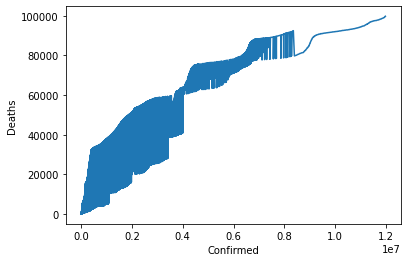

In [ ]:
sns.lineplot(data=data, x='Confirmed', y='Deaths')

In [ ]:
sns.scatterplot(data=data, x='Confirmed', y='Deaths', hue='time')

ValueError: ignored

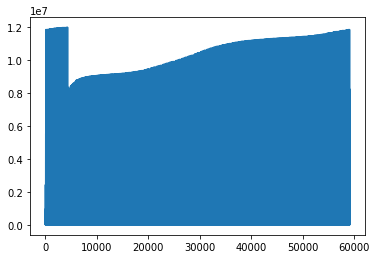

In [ ]:
data['Confirmed'].plot.line()

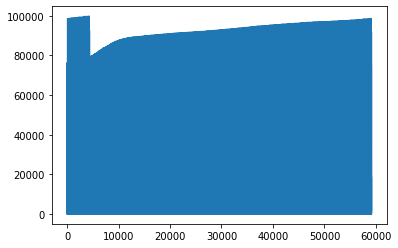

In [ ]:
data['Deaths'].plot.line()

In [ ]:
import folium
json = r'/content/drive/My Drive/CS 631 Introduction to Big Data/New folder/us-states.json'
# Create a map centered on the USA
map = folium.Map(location=[39.8283, -98.5795], zoom_start=5)

# Add a choropleth layer to the map
folium.Choropleth(
    geo_data=json,
    name='Confirmed cases',
    data=data,
    columns=['Province_State', 'Confirmed'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Confirmed Cases'
).add_to(map)

# Display the map
map.save("index.html")
map


If there are duplicate rows, you can drop them using the drop_duplicates() function.

df.drop_duplicates(inplace=True)

In [ ]:
data.drop('Country_Region', axis=1, inplace=True)
data.drop('Last_Update',axis=1, inplace=True)
data.drop('Lat', axis=1, inplace=True)
data.drop('Long_', axis=1, inplace=True)
data.drop('People_Hospitalized', axis=1, inplace=True)
data.drop('Hospitalization_Rate', axis=1, inplace=True)
data.drop('People_Tested', axis=1, inplace=True)
data.drop('Mortality_Rate', axis=1, inplace=True)
data.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Date
0,Alabama,365747,4872,202137.0,158738.0,1.0,7459.375895,NaN,1.332068,84000001.0,USA,NaN,2021-01-01
1,Alaska,47019,206,7165.0,39648.0,2.0,6427.355802,1275750.0,0.438121,84000002.0,USA,174391.185778,2021-01-01
2,American Samoa,0,0,NaN,NaN,60.0,0.000000,2140.0,NaN,16.0,ASM,3846.084722,2021-01-01
3,Arizona,530267,9015,76934.0,444318.0,4.0,7285.171274,5155330.0,1.700087,84000004.0,USA,39551.860582,2021-01-01
4,Arkansas,229442,3711,199247.0,26484.0,5.0,7602.945718,2051488.0,1.617402,84000005.0,USA,67979.497674,2021-01-01


In [ ]:
print(data['Province_State'].unique())

['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming' 'Recovered']


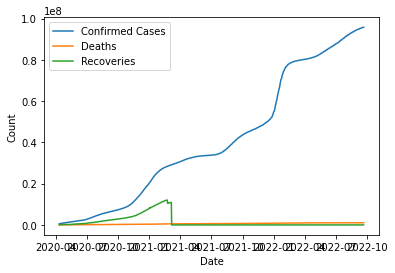

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
data1 = data.groupby("Date").sum()

# Create the line plot
plt.plot(data1["Confirmed"], label="Confirmed Cases")
plt.plot(data1["Deaths"], label="Deaths")
plt.plot(data1["Recovered"], label="Recoveries")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
import matplotlib as mpl

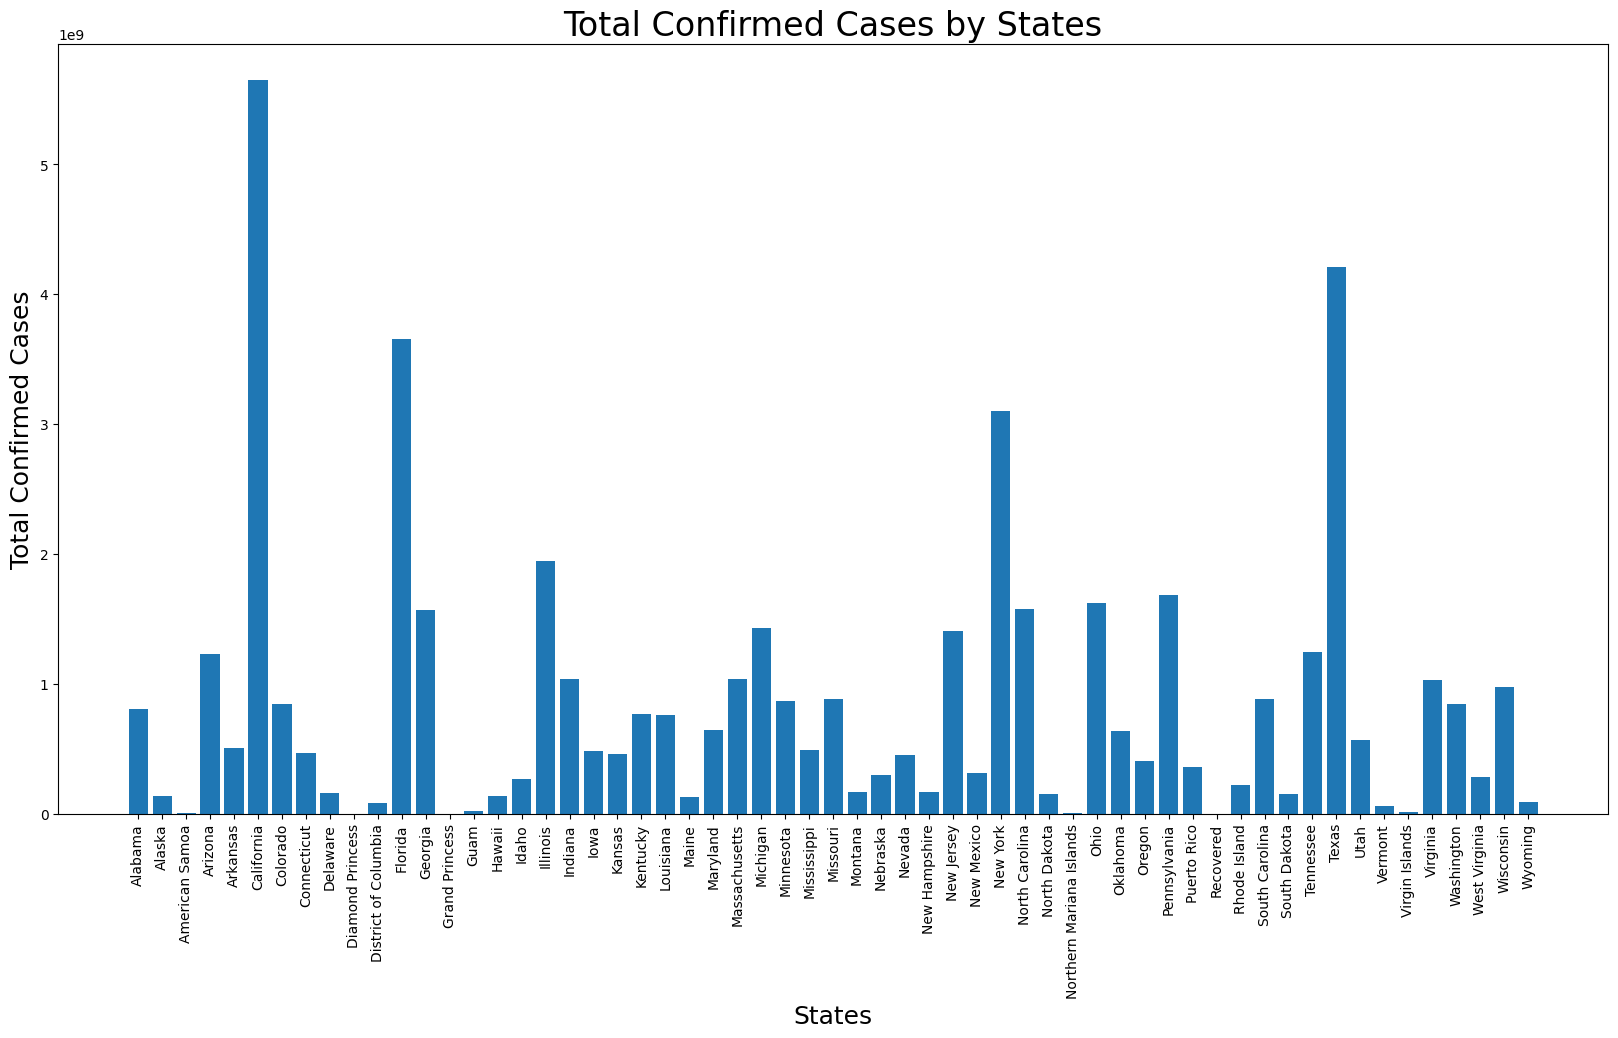

In [227]:
data = data.groupby('Province_State')['Confirmed'].sum()

# Create a figure with a width of 20 and a height of 10
plt.figure(figsize=(20, 10))
# Create a bar plot
plt.bar(data.index, data.values)
plt.xlabel('States', fontsize=18)
plt.ylabel('Total Confirmed Cases', fontsize=18)
plt.title('Total Confirmed Cases by States', fontsize=24)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data = data.to_frame()
data.columns

Index(['Confirmed'], dtype='object')

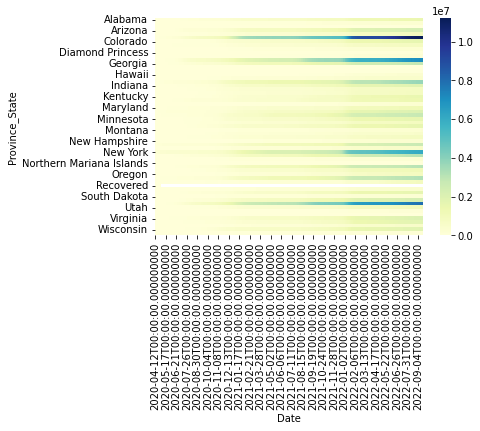

In [ ]:
data = pd.read_csv("/content/drive/My Drive/CS 631 Introduction to Big Data/New folder/combined_csv.csv")

# Convert 'Date' column to datetime
data["Date"] = pd.to_datetime(data["Date"])

# Create pivot table with rows as Province_State, columns as 'Date' and values as 'Confirmed'
data_pivot = data.pivot_table(values='Confirmed', index='Province_State', columns='Date')

# Create heatmap
sns.heatmap(data_pivot, cmap='YlGnBu')

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Load the data and keep only the 'Confirmed' column
data = pd.read_csv("/content/drive/My Drive/CS 631 Introduction to Big Data/New folder/combined_csv.csv")
data = data[['Confirmed']]

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [ ]:
# Function to create a time-series dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

In [ ]:
# Use the function to create time-series dataset
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# Reshape the input data for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

You can track the train loss and validation loss using the callback functions in Keras. The EarlyStopping callback is a commonly used method to monitor the validation loss and stop the training process if the validation loss has not improved after a specified number of epochs.

In [ ]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
#           epochs=100, batch_size=32, callbacks=[early_stopping])

The monitor argument is set to 'val_loss' to monitor the validation loss, and patience argument is set to 10, meaning that training will stop after 10 epochs if the validation loss does not improve. The history object returned by the fit function can then be used to plot the train and validation loss over the epochs 
to see the trend.


---






In [ ]:
# Fit the model to the training data
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
39608/39608 - 56s - loss: 0.0125 - 56s/epoch - 1ms/step
Epoch 2/100
39608/39608 - 58s - loss: 0.0124 - 58s/epoch - 1ms/step
Epoch 3/100
39608/39608 - 57s - loss: 0.0123 - 57s/epoch - 1ms/step
Epoch 4/100
39608/39608 - 56s - loss: 0.0123 - 56s/epoch - 1ms/step
Epoch 5/100
39608/39608 - 54s - loss: 0.0123 - 54s/epoch - 1ms/step
Epoch 6/100
39608/39608 - 54s - loss: 0.0123 - 54s/epoch - 1ms/step
Epoch 7/100
39608/39608 - 54s - loss: 0.0122 - 54s/epoch - 1ms/step
Epoch 8/100
39608/39608 - 54s - loss: 0.0122 - 54s/epoch - 1ms/step
Epoch 9/100
39608/39608 - 54s - loss: 0.0122 - 54s/epoch - 1ms/step
Epoch 10/100
39608/39608 - 54s - loss: 0.0121 - 54s/epoch - 1ms/step
Epoch 11/100
39608/39608 - 55s - loss: 0.0121 - 55s/epoch - 1ms/step
Epoch 12/100
39608/39608 - 54s - loss: 0.0121 - 54s/epoch - 1ms/step
Epoch 13/100
39608/39608 - 54s - loss: 0.0121 - 54s/epoch - 1ms/step
Epoch 14/100
39608/39608 - 60s - loss: 0.0121 - 60s/epoch - 2ms/step
Epoch 15/100
39608/39608 - 61s - loss: 0.01

In [ ]:
# Predict on the test data
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

610/610 [==============================] - 1s 1ms/step


In [ ]:
# Inverse transform the predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
from sklearn.metrics import mean_squared_error
# Evaluate the model using mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1311944.64 RMSE


ValueError: ignored

LSTMs are commonly used for time series forecasting, especially for datasets with long-term dependencies. However, there are other machine learning models that may perform better for a given problem, such as ARIMA, SARIMA, Prophet, and Random Forest. The choice of the model depends on the nature of the data and the problem being solved. It is important to try multiple models, tune their hyperparameters, and compare their performance to find the best model for a given problem.

ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting model used for univariate time series data, i.e., where the data has only one variable. ARIMA models the relationship between the current observation and a linear combination of previous observations and residual errors, and it models the relationships between observations and their differences (integrated) over time.

SARIMA (Seasonal AutoRegressive Integrated Moving Average) is an extension of ARIMA that considers seasonality in time series data. It takes into account the repeating patterns in the data, such as daily, weekly, or yearly patterns. The seasonal component of the model is defined by the seasonal order, which consists of the seasonal autoregression (SAR), seasonal differences (I), and seasonal moving average (SMA) parameters.

Prophet is a time series forecasting model developed by Facebook. It is designed to be flexible and easy to use, and it is suitable for time series with linear or non-linear growth patterns, as well as for time series with multiple seasonality. Prophet is a decomposable time series model, which means that it separates the time series into its trend, seasonality, and holiday components. The model can also incorporate additional information such as holidays and events, which can be used to improve the forecast accuracy.

In terms of comparison, ARIMA and SARIMA are classical time series models that are good for modeling univariate time series data. They are appropriate for data with linear or non-linear trends and with or without seasonality. Prophet is a newer model that is specifically designed to be flexible and easy to use, and it is suitable for time series with multiple seasonality. The choice of the best model depends on the nature of the time series data and the problem requirements. It's recommended to experiment with different models and select the one that provides the best performance for your particular time series data.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
data = pd.read_csv("/content/drive/My Drive/CS 631 Introduction to Big Data/New folder/combined_csv.csv")

# Sort data by date
data.sort_values(by='Date', inplace=True)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index of the dataframe
data.set_index('Date', inplace=True)

# Extract the target variable 'Confirmed'
y = data['Confirmed']

# Split the data into training and testing sets
train = y[:int(0.8*(len(y)))]
test = y[int(0.8*(len(y))):]

In [ ]:
# Train the SARIMA model
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

In [ ]:
# Generate predictions for the test set
predictions = results.predict(start=test.index[0], end=test.index[-1], typ='levels')


sklearn >= 0.22.0

sklearn.metrics has a mean_squared_error function with a squared kwarg (defaults to True). 
Setting squared to False will return the RMSE.

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_actual, y_predicted, squared=False)

sklearn < 0.22.0

sklearn.metrics has a mean_squared_error function. The RMSE is just the square root of whatever it returns.

from sklearn.metrics import mean_squared_error

from math import sqrt

rms = sqrt(mean_squared_error(y_actual, y_predicted))

In [ ]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
# Calculate RMSE for SARIMA
rmse = sqrt(mean_squared_error(test_data, predictions))
print("SARIMA RMSE: ", rmse)

In [ ]:
# Plot the actual vs predicted values
plt.plot(test.values, label='actual')
plt.plot(predictions, label='predicted')
plt.legend()
plt.show()

In [ ]:
from fbprophet import Prophet

# Load data
data = pd.read_csv("/content/drive/My Drive/CS 631 Introduction to Big Data/New folder/combined_csv.csv")

# Format data
data = data.rename(columns={'ds': 'Date', 'y': 'Confirmed'})
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Fit model
model = Prophet()
model.fit(data)

In [ ]:
# Create future dataframe
future = model.make_future_dataframe(periods=30)

In [ ]:
# Forecast future data
forecast = model.predict(future)

In [ ]:
# Plot results
model.plot(forecast)
model.plot_components(forecast)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset into a pandas DataFrame
df = pd.read_csv("<your_dataset>.csv")

# Divide the dataset into input features (X) and target variable (y)
X = df.drop("target_variable", axis=1)
y = df["target_variable"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model on the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error between the true target values and the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)


Cross-validation is a widely used technique for evaluating the performance of machine learning models. It helps in reducing the risk of overfitting by dividing the data into training and validation sets, and testing the model's performance on the validation set. In cross-validation, we divide the data into "k" equal parts, train the model on k-1 parts and test it on the remaining part. This process is repeated "k" times, with each part being used as the validation set once. The average performance of the model on all k iterations is used to get an overall performance score of the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Load the dataset
X, y = load_data("path/to/dataset.csv")

In [ ]:
# Create a random forest classifier
model = RandomForestClassifier()

In [ ]:
# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=10)

In [ ]:
# Print the average accuracy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))